In [11]:
import pandas as pd
from load_data import load_xml_to_df
import networkx as nx
from consts import *
from build_graph import build_bi_partite_graph

In [10]:
data_path = "1_ADR24Q2.xml"
data = load_xml_to_df(data_path)


              drug                                  reaction  \
0          AIMOVIG                   Device difficult to use   
1          AIMOVIG              Drug dose omission by device   
2          AIMOVIG  Wrong technique in product usage process   
3            REBIF                   Blood glucose increased   
4            REBIF                 Blood bilirubin increased   
...            ...                                       ...   
6439911  MAGNESIUM                                 Infection   
6439912  MAGNESIUM                    Immune system disorder   
6439913    ARANESP                                  Dialysis   
6439914   DUPIXENT      Product use in unapproved indication   
6439915   DUPIXENT      Product use in unapproved indication   

                                      drug_type  
0                                      Migraine  
1                                      Migraine  
2                                      Migraine  
3        Relapsing-remitting mu

In [15]:
graph = build_bi_partite_graph(data, DRUG, REACTION)
print(graph)
nx.write_graphml(graph, "graph1.graphml")

Graph with 22650 nodes and 830137 edges


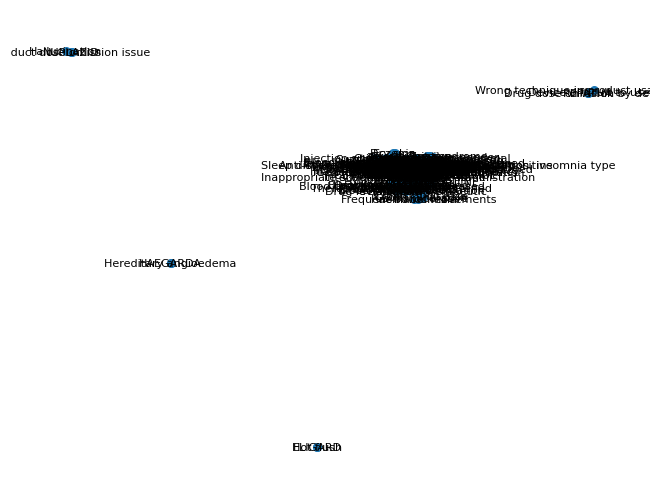

In [28]:
edges_with_attributes = graph.edges(data=True)
sorted_edges = sorted(edges_with_attributes, key=lambda x: x[2]['weight'], reverse=True)
top_edges = sorted_edges[:500]
new_graph = nx.Graph()
new_graph.add_edges_from(top_edges)

layout = nx.spring_layout(new_graph, weight="weight")
nx.draw(new_graph, layout, node_size=30,
        with_labels=True,
        font_size=8)
nx.write_graphml(new_graph, "graph3.graphml")